<a href="https://colab.research.google.com/github/vhrique/anne_ptbr/blob/main/03_Redes_Neurais_Convolucionais.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Redes Neurais Convolucionais

As redes neurais convolucionais (CNNs) surgiram como uma evolução natural das redes neurais perceptron multicamadas (MLPs) para lidar com dados estruturados em forma de grade, como imagens. Enquanto as MLPs conectam todos os neurônios de uma camada à seguinte, as CNNs exploram propriedades espaciais, aplicando filtros locais (convoluções) que capturam padrões como bordas, texturas e formas. Isso reduz drasticamente o número de parâmetros em comparação com MLPs para entradas de alta dimensão, além de introduzir indutivas de localidade e invariância translacional, tornando-as mais adequadas para visão computacional.

A arquitetura básica de uma CNN combina três blocos principais: camadas convolucionais (responsáveis por extrair características locais), camadas de pooling (que reduzem a dimensionalidade e aumentam a robustez a pequenas variações) e camadas totalmente conectadas no final (responsáveis pela decisão ou regressão, semelhante às MLPs). Esse desenho hierárquico permite que a rede aprenda representações de baixo nível até conceitos de alto nível. Assim, CNNs superaram MLPs em tarefas como reconhecimento de imagens, tornando-se o paradigma dominante em visão computacional até o surgimento de arquiteturas baseadas em attention, como Transformers.

## Limitações da MLP

A MLP é uma arquitetura versátil que, de acordo com o teorema de aproximação universal (Hornik et al, 1989), pode aprender qualquer função.
Apesar disso, podem ser necessários muitos neurônios e, consequentemente, muitos parâmetros.
Neste caso, em tarefas muito complexas e com muitos parâmetros, torna-se necessário ter à disposição muitos dados (Alwosheel et al, 2018), o que geralmente não é possível.

Em tarefas como visão computacional ou análise de sinais, podemos ter centenas a milhares de atributos de entrada (pixels/amostras) que, quando conectadas com camadas ocultas com centenas a milhares de neurônios, geram milhares a milhões de parâmetros que devem ser aprendidos.
Nestes casos, seriam necessárias ainda mais amostras (em torno de 10 a 50 vezes o número de parâmetros).

<center><img src="https://github.com/vhrique/anne_ptbr/blob/main/figures/mlp_parameters.jpg?raw=true" width=800></center>

Apesar disso, além de termos alta dimensionalidade em tais problemas, existe também uma estrutura espacial ou temporal que a MLP não explora de forma eficiente, pois trata cada entrada como independente.
Nesse contexto, surgem as redes neurais convolucionais (CNNs), que utilizam filtros locais aplicados sobre regiões da entrada para extrair características relevantes, reduzindo o número de parâmetros e explorando a correlação entre vizinhos. Essa abordagem permite capturar bordas, texturas e padrões repetitivos de maneira hierárquica, tornando as CNNs especialmente adequadas para problemas de visão computacional e análise de sinais.

## Camada de Convolução

A operação de convolução resolve esse problema ao substituir a conexão densa da MLP por kernels (ou filtros) de tamanho reduzido, que percorrem a imagem aplicando o mesmo conjunto de pesos em diferentes regiões. Em vez de aprender um peso para cada pixel em relação a cada neurônio, o kernel aprende um pequeno conjunto de parâmetros compartilhados, capaz de detectar padrões locais como bordas horizontais, verticais ou texturas. Esse mecanismo reduz drasticamente o número de parâmetros e garante que uma mesma característica possa ser reconhecida em qualquer posição da imagem.

<center><img src="https://github.com/vhrique/anne_ptbr/blob/main/figures/convolution.jpg?raw=true" width=600></center>

Visualmente, o kernel pode ser entendido como um “perceptron local” que analisa apenas uma vizinhança da entrada, e cuja aplicação repetida sobre toda a imagem permite compor representações cada vez mais complexas.

<center><img src="https://github.com/vhrique/anne_ptbr/blob/main/figures/kernel.jpg?raw=true" width=500></center>

A convolução introduz dois conceitos fundamentais: compartilhamento de pesos e invariância translacional. Como o mesmo kernel é aplicado em toda a extensão da imagem, a rede não precisa aprender separadamente o mesmo padrão em diferentes posições, o que reduz ainda mais a quantidade de parâmetros e aumenta a capacidade de generalização. Além disso, uma característica detectada em um ponto (como uma borda ou textura) poderá ser reconhecida em qualquer outra região da imagem. Dessa forma, a convolução estabelece a base para a extração de features robustas e reutilizáveis, preparando o terreno para a sequência natural de operações em CNNs: funções de ativação, pooling e, por fim, camadas densas para a decisão final.





## Funções de Ativação

Após a convolução, aplica-se uma função de ativação não linear para permitir que a rede aprenda representações complexas. Nas CNNs, a mais utilizada é a ReLU (Rectified Linear Unit), que é simples, eficiente e reduz o problema do gradiente desaparecendo. Uma variação é a Leaky ReLU, que mantém um pequeno valor negativo para entradas menores que zero, evitando o problema dos neurônios “mortos” que nunca ativam. Mais recentemente, a GeLU (Gaussian Error Linear Unit) tem sido usada em arquiteturas avançadas, pois suaviza a transição entre valores negativos e positivos com base em uma função probabilística, oferecendo melhor desempenho em alguns cenários, especialmente em modelos de larga escala.

### ReLU

A função de ativação ReLU (Naim & Hinton, 2010), popularizada com a AlexNet, é uma das mais utilizadas em redes neurais modernas devido à sua simplicidade e eficácia. Sua fórmula é
$f(x)=\text{max}(0,x)$ , o que significa que ela transforma valores negativos em zero, enquanto mantém valores positivos inalterados. Isso introduz não-linearidade na rede, permitindo que ela aprenda padrões complexos. Comparada a funções de ativação anteriores, como sigmoid e tanh, a ReLU tem a vantagem de ser computacionalmente mais eficiente e de mitigar o problema do desvanecimento do gradiente, uma vez que seus gradientes são constantes para entradas positivas. No entanto, ReLU também pode sofrer com o problema de "neurônios mortos" quando muitas unidades se tornam zero, o que pode ser tratado com variantes como Leaky ReLU e GeLU (gaussian error linear unit).

In [1]:
import numpy as np

import matplotlib.pyplot as plt

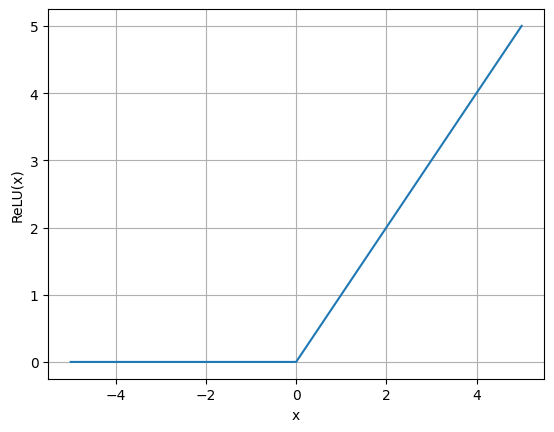

In [10]:
x = np.linspace(-5, 5, 101)
y = np.array([max(i, 0) for i in x])

plt.plot(x, y)
plt.xlabel('x')
plt.ylabel('ReLU(x)')
plt.grid()
plt.show()

### Variantes (Leaky ReLU e GeLU)

Para diminuir problemas de neurônios mortos, variantes como Leaky ReLU e GeLU possuem valores diferentes de zero quando X é negativo.
Leaky Relu, utilizando um certo valor $\alpha$, possui o formato $f(x,\alpha)=\text{max}(\alpha.x,x)$, enquanto GeLU pesa a entrada pelo quanto ela é provável de ser positiva sob uma distribuição normal padrão.

In [6]:
from scipy.special import erf

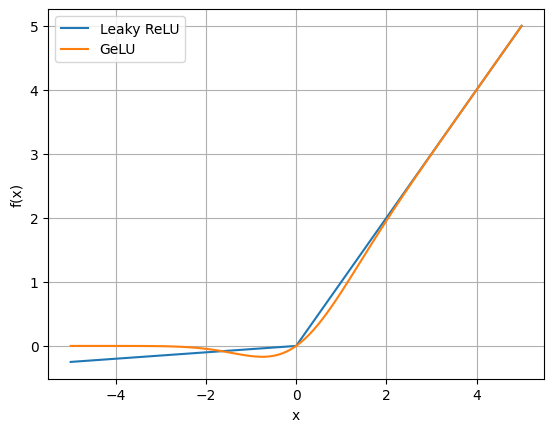

In [15]:
x = np.linspace(-5, 5, 101)

lrelu = np.array([max(i, 0.05*i) for i in x])
gelu = 0.5 * x * (1 + erf(x / np.sqrt(2)))

plt.plot(x, lrelu)
plt.plot(x, gelu)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.grid()
plt.legend(['Leaky ReLU', 'GeLU'])
plt.show()

## Camada de _Pooling_

A camada de pooling é utilizada para reduzir a dimensionalidade espacial das representações sem perder informações essenciais. Ela aplica uma operação de agregação em regiões locais da saída da convolução, sendo as mais comuns o max pooling (que seleciona o valor máximo) e o average pooling (que calcula a média). Esse processo traz dois benefícios principais: diminui o número de parâmetros e cálculos nas camadas seguintes e aumenta a robustez da rede a pequenas variações na entrada, já que detalhes locais são resumidos em características mais estáveis.

<center><img src="https://github.com/vhrique/anne_ptbr/blob/main/figures/conv.jpg?raw=true" width="500"></center>

## Camadas de Normalização

Camadas de normalização surgiram para estabilizar e acelerar o treinamento de redes profundas. Nas primeiras CNNs, era comum o uso de Local Response Normalization (LRN), que normalizava a ativação de um neurônio considerando seus vizinhos próximos, inspirada em mecanismos biológicos de inibição lateral. Mais tarde, a técnica de Batch Normalization (BatchNorm) se tornou dominante, pois normaliza as ativações de cada camada em um mini-batch, reduzindo o internal covariate shift e permitindo taxas de aprendizado maiores e convergência mais estável.

### Local Response Normalization

A Local Response Normalization (LRN) é uma técnica de normalização usada em redes neurais convolucionais, introduzida pela primeira vez na AlexNet. Inspirada pela inibição lateral em neurônios biológicos, a LRN normaliza a ativação de um neurônio considerando a resposta de seus neurônios vizinhos dentro de uma pequena região. Isso ajuda a destacar ativações mais fortes e suprimir as mais fracas, promovendo uma competição entre neurônios e melhorando a generalização da rede. Embora tenha sido popular em arquiteturas antigas, como AlexNet e GoogLeNet, o LRN foi substituído por métodos mais modernos, como o Batch Normalization

<center><img src="https://github.com/vhrique/anne_ptbr/blob/main/figures/lrnorm.jpg?raw=true" width=300></center>

### Batch Normalization

Batch Normalization (BN), introduzido por Ioffe e Szegedy em 2015, é uma técnica que normaliza as ativações de uma camada neural para cada mini-lote durante o treinamento. O principal objetivo do Batch Normalization é mitigar o problema do deslocamento interno da covariância, que ocorre quando as distribuições das ativações mudam de forma significativa entre as camadas durante o treinamento, dificultando a convergência. Ao normalizar as ativações de cada mini-lote com base na média e na variância, o BN estabiliza e acelera o treinamento, permitindo o uso de taxas de aprendizado maiores. Além disso, o BN atua como uma forma de regularização, reduzindo a necessidade de técnicas como o Dropout, e facilita o treinamento de redes neurais mais profundas. Essa técnica foi amplamente adotada em arquiteturas modernas, como a ResNet, e se tornou um componente padrão na maioria das redes neurais convolucionais.

<center><img src="https://github.com/vhrique/anne_ptbr/blob/main/figures/batchnorm.jpg?raw=true" width=300></center>

### Outras camadas de Normalização

Além da BatchNorm, outras normalizações foram propostas para lidar com diferentes cenários. A Layer Normalization (LayerNorm) atua normalizando todas as ativações de uma amostra em uma camada, de forma independente do tamanho do batch, sendo amplamente usada em arquiteturas baseadas em transformers. Já a Instance Normalization (InstanceNorm) normaliza cada canal de cada amostra separadamente, sem considerar estatísticas do batch, o que a tornou popular em aplicações de visão computacional como style transfer. Por fim, a Group Normalization (GroupNorm) divide os canais em grupos e normaliza dentro de cada grupo, funcionando bem mesmo com batches muito pequenos, o que a torna útil em tarefas de visão de alta resolução em que limitações de memória restringem o tamanho do batch.

## Camadas Densas (ou Completamente Conectadas)

Por fim, após as etapas de convolução, ativação, pooling e normalização, as CNNs geralmente utilizam camadas densas para realizar a decisão final. Essas camadas funcionam de forma idêntica às que já vimos na MLP: todos os neurônios são conectados a todas as entradas, permitindo combinar as características extraídas anteriormente em uma representação de alto nível. Assim, enquanto as camadas convolucionais atuam como extratoras de features, as camadas densas cumprem o papel de classificador ou regressor, dependendo da tarefa.

# Decisões de Projeto de Redes Neurais Convolucionais

## Profundidade e Largura

Profundidade: Número de Camadas
Largura: Número de "filtros"

## Tamanho de _Kernel_

Tamanho do Filtro

## Passo

## Dilatação

## Convoluções Assimétricas

Além das convoluções de múltiplas escalas, um avanço significativo que surgiu em versões posteriores, como na Inception v2 e Inception v3, foi o uso de convoluções assimétricas, como as convoluções 3x1 e 1x3. Essas convoluções assimétricas foram introduzidas para melhorar ainda mais a eficiência da rede. Ao decompor uma convolução regular de 3x3 em duas operações menores, como uma convolução 3x1 (captura de características na dimensão horizontal) e uma 1x3 (captura de características na dimensão vertical), a rede pode manter o mesmo campo receptivo de uma convolução 3x3, porém com menos parâmetros e menor custo computacional. Essa técnica ajuda a rede a capturar padrões em direções específicas de forma mais eficiente, além de reduzir a quantidade de cálculos envolvidos.

## Convoluções 1x1

As convoluções 1x1 foram introduzidas para melhorar a eficiência computacional e a flexibilidade das redes neurais convolucionais, especialmente em arquiteturas como a Inception. Embora inicialmente possam parecer triviais, as convoluções 1x1 têm um papel crucial em reduzir a dimensionalidade dos dados sem perder informações relevantes. Ao aplicar um filtro 1x1, a convolução é realizada apenas sobre a profundidade (ou canais) da entrada, sem afetar a largura ou altura da imagem. Isso permite a fusão de informações de diferentes canais, o que facilita a combinação de características complexas de forma eficiente. Além disso, essa técnica reduz o número de parâmetros e operações, resultando em uma rede mais leve e rápida, o que foi fundamental para o sucesso de redes profundas como a GoogLeNet e ResNet.

## Conexões Residuais

As conexões residuais foram a principal inovação da ResNet e representam um avanço crucial no design de redes neurais profundas. Elas introduzem um atalho que permite que o sinal original da entrada seja passado diretamente para uma camada posterior, sem passar pelas camadas intermediárias, criando o que é chamado de mapeamento de identidade. Esse conceito resolve o problema do gradiente desvanecente, que dificultava o treinamento de redes muito profundas, ao garantir que os gradientes possam fluir de forma mais eficaz para as camadas anteriores. As conexões residuais permitem que a rede aprenda diferenças residuais em vez de tentar ajustar o mapeamento completo da função, o que facilita o aprendizado. Como resultado, redes muito profundas, como as versões da ResNet com 50, 101 ou até 152 camadas, podem ser treinadas de maneira eficaz, sem degradação de desempenho, permitindo que elas capturem representações complexas dos dados.

<center><img src="https://github.com/vhrique/anne_ptbr/blob/main/figures/resnet.png?raw=true"></center>

# Aplicações de Redes Neurais Convolucionais

Embora as CNNs sejam amplamente conhecidas por suas aplicações em visão computacional, elas também têm sido adaptadas para lidar com séries temporais e outros tipos de dados não visuais. Em séries temporais, as CNNs podem capturar padrões locais ao longo do tempo, assim como capturam padrões espaciais em imagens, aplicando convoluções para detectar tendências, sazonalidades ou eventos relevantes em sequências temporais. Por exemplo, CNNs são usadas em previsões financeiras, onde conseguem identificar padrões em dados históricos de preços, ou em análise de sinais biomédicos, como ECGs, para detectar anomalias de saúde. Além disso, CNNs têm sido aplicadas a dados textuais para tarefas de classificação de texto e análise de sentimentos, onde as convoluções identificam sequências de palavras ou frases relevantes. Ao lidar com dados sequenciais, as CNNs competem com RNNs e Transformers, mostrando que são versáteis e eficazes em diversos tipos de dados, além de imagens.

# Exemplo

# Considerações Finais

Nesta aula, falamos sobre redes neurais aplicadas a visão computacional. Mais especificamente, falamos sobre redes neurais convolucionais e suas aplicações e reconhecimento de imagens, detecção de objetos, e segmentação.

## Próxima Aula

Na próxima aula, falaremos sobre arquiteturas especializadas em modelagem de sequencias, como séries temporais e texto, utilizando redes neurais recorrentes e transformers.

# Exercícios

1. Verifique o exemplo da aula 3 para visão computacional.
2. Porque a EfficientNet-Lite0 foi menos eficiente que a LeNet5?
3. Como podemos melhorar a resultado da EfficientNet-Lite0? Implemente esta solução.

# Referências

- Hornik, K., Stinchcombe, M., & White, H. (1989). Multilayer feedforward networks are universal approximators. Neural networks, 2(5), 359-366.
- Alwosheel, A., Van Cranenburgh, S., & Chorus, C. G. (2018). Is your dataset big enough? Sample size requirements when using artificial neural networks for discrete choice analysis. Journal of choice modelling, 28, 167-182.
- Fukushima, K. (1980). Neocognitron: A self-organizing neural network model for a mechanism of pattern recognition unaffected by shift in position. Biological cybernetics, 36(4), 193-202.
- LeCun, Y., Bottou, L., Bengio, Y., & Haffner, P. (1998). Gradient-based learning applied to document recognition. Proceedings of the IEEE, 86(11), 2278-2324.
- LeNail, (2019). NN-SVG: Publication-Ready Neural Network Architecture Schematics. Journal of Open Source Software, 4(33), 747, https://doi.org/10.21105/joss.00747
- Krizhevsky, A., Sutskever, I., & Hinton, G. E. (2012). Imagenet classification with deep convolutional neural networks. Advances in neural information processing systems, 25.
- Nair, V., & Hinton, G. E. (2010). Rectified linear units improve restricted boltzmann machines. In Proceedings of the 27th international conference on machine learning (ICML-10) (pp. 807-814).
- Zhang, C., Bengio, S., Hardt, M., Recht, B., & Vinyals, O. (2021). Understanding deep learning (still) requires rethinking generalization. Communications of the ACM, 64(3), 107-115.
- Zhang, C., Bengio, S., Hardt, M., Recht, B., & Vinyals, O. (2021). Understanding deep learning (still) requires rethinking generalization. Communications of the ACM, 64(3), 107-115.
- Simonyan, K., & Zisserman, A. (2014). Very deep convolutional networks for large-scale image recognition. arXiv preprint arXiv:1409.1556.
- Szegedy, C., Liu, W., Jia, Y., Sermanet, P., Reed, S., Anguelov, D., ... & Rabinovich, A. (2015). Going deeper with convolutions. In Proceedings of the IEEE conference on computer vision and pattern recognition (pp. 1-9).
- He, K., Zhang, X., Ren, S., & Sun, J. (2016). Deep residual learning for image recognition. In Proceedings of the IEEE conference on computer vision and pattern recognition (pp. 770-778).
- Ioffe, S. (2015). Batch normalization: Accelerating deep network training by reducing internal covariate shift. arXiv preprint arXiv:1502.03167.
- Girshick, R., Donahue, J., Darrell, T., & Malik, J. (2014). Rich feature hierarchies for accurate object detection and semantic segmentation. In Proceedings of the IEEE conference on computer vision and pattern recognition (pp. 580-587).
- Girshick, R. (2015). Fast r-cnn. arXiv preprint arXiv:1504.08083.
- Ren, S. et al. (2015). Faster r-cnn: Towards real-time object detection with region proposal networks. arXiv preprint arXiv:1506.01497.
- Redmon, J., Divvala, S., Girshick, R., & Farhadi, A. (2015). You only look once: unified, real-time object detection (2015). arXiv preprint arXiv:1506.02640, 825.
- Redmon, J. (2018). Yolov3: An incremental improvement. arXiv preprint arXiv:1804.02767.
- Lin, T. Y., Dollár, P., Girshick, R., He, K., Hariharan, B., & Belongie, S. (2017). Feature pyramid networks for object detection. In Proceedings of the IEEE conference on computer vision and pattern recognition (pp. 2117-2125).
- Lin, T. (2017). Focal Loss for Dense Object Detection. arXiv preprint arXiv:1708.02002.
- Long, J., Shelhamer, E., & Darrell, T. (2015). Fully convolutional networks for semantic segmentation. In Proceedings of the IEEE conference on computer vision and pattern recognition (pp. 3431-3440).
- Ronneberger, O., Fischer, P., & Brox, T. (2015). U-net: Convolutional networks for biomedical image segmentation. In Medical image computing and computer-assisted intervention–MICCAI 2015: 18th international conference, Munich, Germany, October 5-9, 2015, proceedings, part III 18 (pp. 234-241). Springer International Publishing.
- Chen, L. C. (2014). Semantic image segmentation with deep convolutional nets and fully connected CRFs. arXiv preprint arXiv:1412.7062.
- Chen, L. C., Papandreou, G., Kokkinos, I., Murphy, K., & Yuille, A. L. (2017). Deeplab: Semantic image segmentation with deep convolutional nets, atrous convolution, and fully connected crfs. IEEE transactions on pattern analysis and machine intelligence, 40(4), 834-848.
- Chen, L. C. (2017). Rethinking atrous convolution for semantic image segmentation. arXiv preprint arXiv:1706.05587.
- He, K., Gkioxari, G., Dollár, P., & Girshick, R. (2017). Mask r-cnn. In Proceedings of the IEEE international conference on computer vision (pp. 2961-2969).
- Milletari, F., Navab, N., & Ahmadi, S. A. (2016, October). V-net: Fully convolutional neural networks for volumetric medical image segmentation. In 2016 fourth international conference on 3D vision (3DV) (pp. 565-571). Ieee.

